# Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique and a classification method used in machine learning and statistics. It has two main purposes:

1. Dimensionality Reduction: LDA projects high-dimensional data onto a lower-dimensional space while maximizing the separability between classes.

2. Classification: LDA can be used as a classifier, predicting the class of new data points based on the learned discriminant functions.

Key features of LDA:
- Supervised learning technique (uses class labels)
- Assumes data is normally distributed
- Aims to maximize between-class variance and minimize within-class variance i.e It finds the direction which maximizes the difference b.w classes.
- Can handle multi-class classification problems


LDA is particularly useful when:
- You need to reduce the number of features in your dataset
- You want to visualize high-dimensional data in 2D or 3D
- You're dealing with classification problems, especially with multiple classes

In this notebook, we'll explore how to implement and use LDA for dimensionality reduction and classification tasks.


Accuracy: 0.67


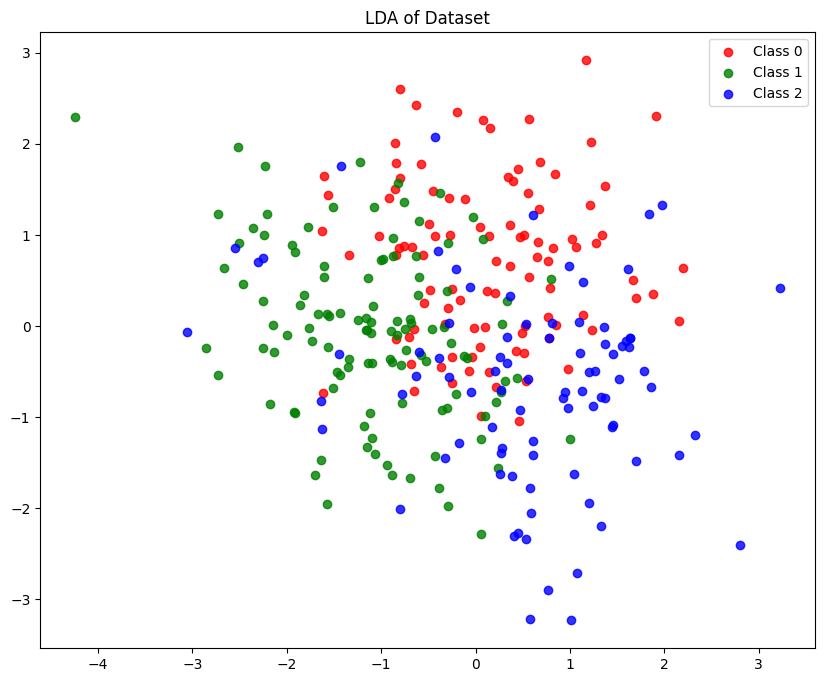

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, n_classes=3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Transform the data
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Predict on the test set
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the results (first two LDA components)
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b']
for color, i, target_name in zip(colors, [0, 1, 2], ['Class 0', 'Class 1', 'Class 2']):
    plt.scatter(X_test_lda[y_test == i, 0], X_test_lda[y_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Dataset')
plt.show()


# Advantages and Disadvantages of LDA

## Advantages:
 1. Dimensionality Reduction: LDA can effectively reduce the number of features while preserving class discriminatory information.
 2. Interpretability: The resulting features are often more interpretable as they represent the axes that maximize class separation.
 3. Regularization: LDA has a built-in regularization effect, which can help prevent overfitting.
 4. Efficient with small sample sizes: LDA can perform well even when the sample size is small, provided the assumptions are met.
 5. Multi-class capability: LDA naturally extends to multi-class classification problems.

## Disadvantages:
 1. Assumes normal distribution: LDA assumes that the data in each class is normally distributed, which may not always be the case.
 2. Assumes equal covariance matrices: LDA assumes that all classes have the same covariance matrix, which may not hold in real-world scenarios.
 3. Limited to linear boundaries: As a linear method, LDA may not perform well on datasets with highly non-linear class boundaries.
 4. Sensitive to outliers: LDA can be significantly affected by outliers in the dataset.
 5. Feature correlation: LDA may struggle when features are highly correlated, as it doesn't handle multicollinearity well.

